In [ ]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt




In [13]:
#This cell builds the Hamiltonian from the lanc coeffs


N = 100  # Krylov dimension
a = np.ones(N)           # diagonal terms
b = np.ones(N) * 0.5      # 1 off diagonal terms (b[0] is unused)
#b[0]=0 in convention but thats not necessary for making H

#making the krylov hamiltonian
Hk = np.zeros((N, N), dtype=complex)
for n in range(N):
    Hk[n, n] = a[n]
    if n + 1 < N:
        Hk[n, n+1] = b[n+1]
        Hk[n+1, n] = b[n+1]

In [14]:
# Eigenvalues and eigenstates of Hamiltonian in K basis
evalue, evect = np.linalg.eig(Hk)


In [15]:
#Calculates the shanon entropy for eigenstates without time evolution
shanons=[]
for psit in evect:
    sk=-1*np.sum( (psit*np.conjugate(psit)) * np.log(psit*np.conjugate(psit)) )
    shanons.append(sk)

In [ ]:
#Calculates the shanon entropy with time evolution 
T = 100      # total time
steps = 100
times = np.linspace(0, T, steps)

shanons=[]

for psi0 in evect:
    for t in times:
        U=expm(-1j*Hk*t)
        psit=U.dot(psi0)
    sk=-1*np.sum( (psit*np.conjugate(psit)) * np.log(psit*np.conjugate(psit)) )
    shanons.append(sk)
    #just printing this to keep track of how far through calculation we are
    print(f"{len(shanons)}/{len(evect)}")

1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


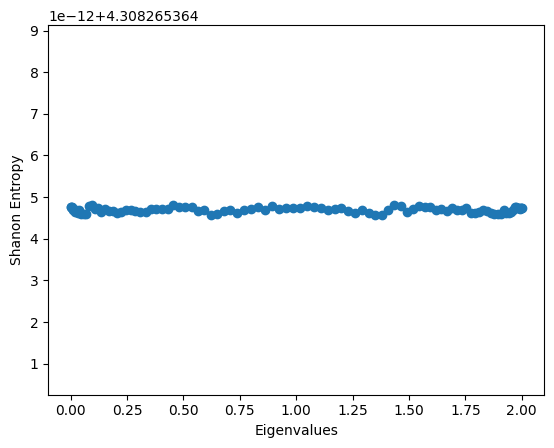

In [17]:
#plt.plot(np.arange(len(evect)),shanons)
plt.xlabel("Eigenvalues")
plt.ylabel("Shanon Entropy")
plt.plot(evalue,shanons, "o")




In [ ]:
import csv
with open('shanonresults.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([[s] for s in shanons])
